<a href="https://colab.research.google.com/github/alahkdmovak/regresion-lineal-parteA/blob/main/Lab_6_regresi%C3%B3n_lineal_Parte_A_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Laboratorio Regresión Lineal
## **Parte A:** estimación de parámetros y sobre-entrenamiento

**Laboratorio Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

**Estudiantes: Alahkdmovak Rúa Cardona - Harrison Andres Henao**

---
# Trabajo de laboratorio

Como trabajo de laboratorio vamos a entrenar un modelo de regresión para el caso **univariado** $y_n = f(x_n) + \epsilon$, donde la salida $ y_n∈ \mathbb{R}$, y la entrada $ x_n ∈ \mathbb{R}$. El procedimiento es el siguiente:

 1. Descargar una base de datos para regresión y visualizarla (por ejemplo buscar en https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets).

 2. Dividir la base de datos en 70% entrenamiento y 30% test, utilizando primero una partición aleatoria, y luego una partición secuencial. Graficar ambos tipos de particiones.

 3. Seleccione dos funciones base ya implementadas (por ejemplo: polinomial, exponencial, y coseno), y además implemente un nuevo tipo de función base que usted eliga, de manera que pueda definir tres modelos diferentes de regresión lineal. 
 
A continuación, establezca la cantidad de funciones base $M$ necesarias para que el modelo se sobreentrene. Seguir el siguiente procedimiento para $M = 1, 2, \cdots, M_{\text{max}}$.

 4. Inferir los parámetros para cada modelo utilizando máxima verosimilitud. 

 5. Grafique las predicciones de los modelos entrenados, junto con los datos de entrenamiento y test.

 5. Calcule el RMSE entre las predicciones de cada modelo `y_pred` y los datos de test `y_test`, así como el RMSE entre las predicciones de cada modelo `y_pred` y los datos de entrenamiento `y_train`. Grafique los errores (eje y) vs el número de caracteristicas (eje x). En base a estas gráficas establezca: 
  - ¿qué modelo presenta mejor capacidad de generalización? argumente.

In [252]:
import numpy as np
import scipy as sp
import sklearn as skl
import matplotlib.pyplot as plt
import pandas as pd

##**1. Base de datos y visualización**
**Base de datos extraida de:** https://archive.ics.uci.edu/ml/datasets/Basketball+dataset

La base de datos contiene mediciones de un acelerómetro que tenía un basquetbolista mientras hacía driblar el balón.

In [253]:
!wget "https://raw.githubusercontent.com/alahkdmovak/regresion-lineal-parteA/main/datos1.txt" -O "datos1.txt"

--2023-05-09 14:46:11--  https://raw.githubusercontent.com/alahkdmovak/regresion-lineal-parteA/main/datos1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66880 (65K) [text/plain]
Saving to: ‘datos1.txt’

datos1.txt          100%[===================>]  65.31K  --.-KB/s    in 0.01s   

2023-05-09 14:46:11 (4.31 MB/s) - ‘datos1.txt’ saved [66880/66880]



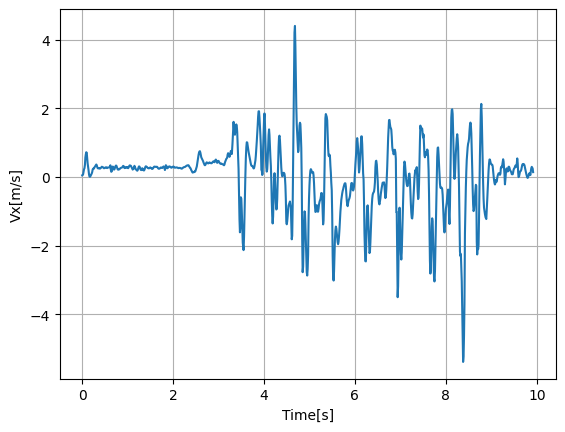

In [254]:
df = pd.read_csv ("datos1.txt", sep = ",")[' X (m/s2)'] # se lee el archivo txt y se extrae solo la columna ' X (m/s2)' 
muestras = pd.read_csv ("datos1.txt", sep = ",")['Time (s)']
datos = df.to_numpy() # Conversión de Dataframe a Array

muestras = muestras.to_numpy()
datos = datos - np.mean(datos)
datos = datos/np.std(datos)

plt.plot(muestras,datos) # Grafica
plt.xlabel("Time[s]")
plt.ylabel("Vx[m/s]")
plt.grid()

##**2. Partición aleatoria y partición secuencial**

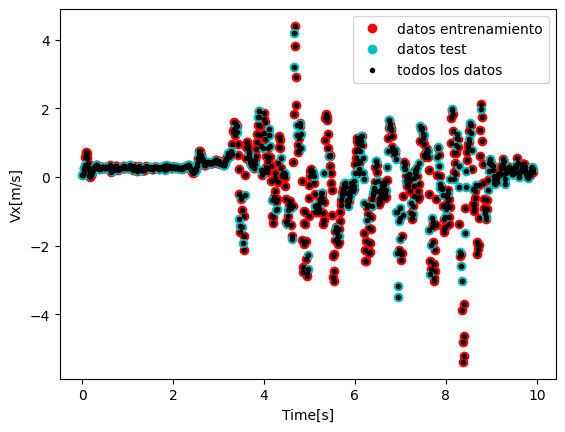

In [ ]:
#PARTICIÓN ALEATORIA

porcion = int(len(muestras)*0.7)

Xs, ys = skl.utils.shuffle(muestras, datos)
Xtrain = Xs[0:porcion] # 70% entrenamiento
ytrain = ys[0:porcion]

Xtest = Xs[porcion:] # 30% test
ytest = ys[porcion:]

plt.plot(Xtrain, ytrain, 'or')
plt.plot(Xtest, ytest, 'oc')
plt.plot(muestras, datos, '.k')
plt.xlabel("Time[s]")
plt.ylabel("Vx[m/s]")
plt.legend(['datos entrenamiento', 'datos test', 'todos los datos'])

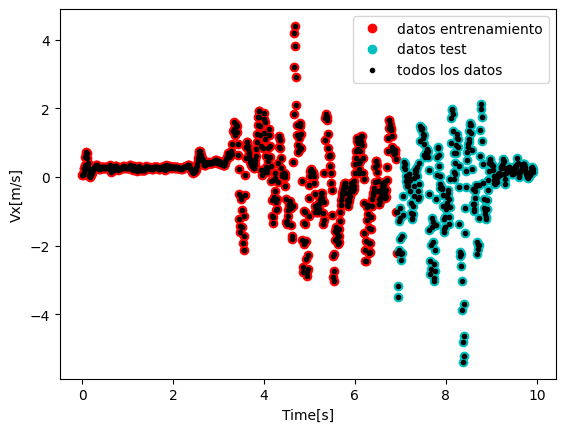

In [ ]:
#PARTICIÓN SECUENCIAL

Xtrain_sec = muestras[0:porcion] # 70% entrenamiento
ytrain_sec = datos[0:porcion]

Xtest_sec = muestras[porcion:] # 30% test
ytest_sec = datos[porcion:]

plt.plot(Xtrain_sec, ytrain_sec, 'or')
plt.plot(Xtest_sec, ytest_sec, 'oc')
plt.plot(muestras, datos, '.k')
plt.xlabel("Time[s]")
plt.ylabel("Vx[m/s]")
plt.legend(['datos entrenamiento', 'datos test', 'todos los datos'])

##**3. Funciones base (exponencial, coseno y función Sigmoidal)**

In [ ]:
def expo_carac(X, K): # FUNCIÓN BASE GAUSSIANA

    X = X.flatten()
    N = X.shape[0]
    
    #inicializar Phi
    Phi = np.ones((N, K+1))
    mu = np.linspace(0,10,K)
    sig2 = 0.005

    # Calcular matriz Phi
    for k in range(1, K+1):
        Phi[:,k] = np.exp(-(mu[k-1] - X)**2/sig2) 
    return Phi

In [ ]:
def trigo_carac(X, K): # FUNCIÓN BASE TRIGONOMETRICA(SENO Y COSENO)
    
    X = X.flatten()
    N = X.shape[0]
    
    #inicializar Phi
    Phi = np.ones((N, K+1))
    F0= 0.1
    F = F0 * np.linspace(1, K, K)
 
    # Calcular matriz Phi
    for k in range(1, K+1):
      if k%2 ==0:
        Phi[:,k] = np.cos(2*np.pi*F[k-1]*X) 
      else:
        Phi[:,k] = np.sin(2*np.pi*F[k-1]*X)
    return Phi

In [ ]:
def sigmo_carac(X, K): # FUNCIÓN BASE SIGMOIDE

    X = X.flatten()
    N = X.shape[0]
    
    #inicializar Phi
    Phi = np.ones((N, K+1))
    mu = np.linspace(0,10,K)
    # Calcular matriz Phi
    for k in range(1,K+1):
      Phi[:,k] = 1/(1 + np.exp(-X + mu[k-1])) 
    return Phi

In [ ]:
def plot_caracteristicas(X, Phi, K):
  legend = []
  for i in range(K+1):
    plt.plot(X, Phi[:, i])
    legend.append(r'$\phi_' + str(i) +'$(x)'  )
  plt.legend(legend);
  plt.grid(True)

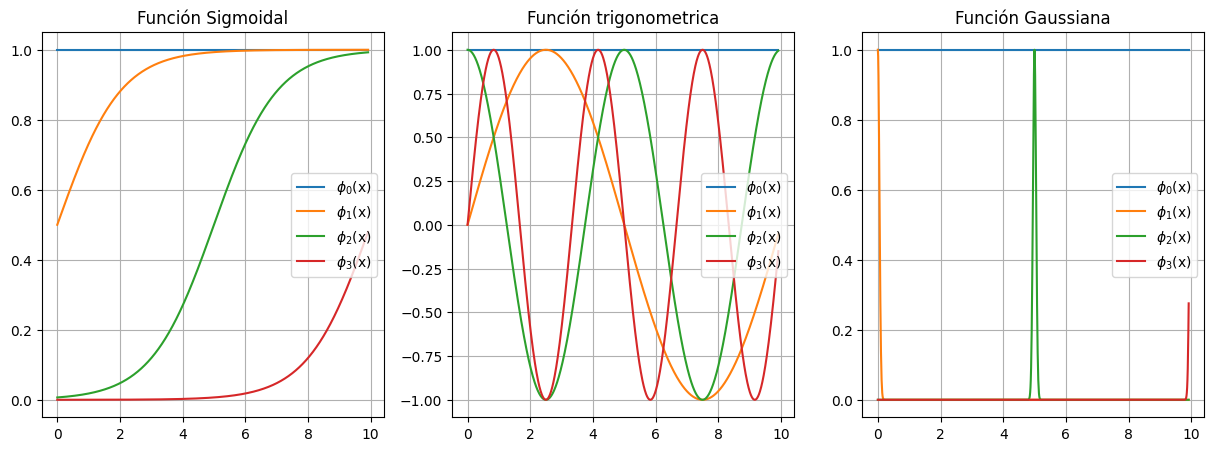

In [ ]:
#Impresión de las funciones base 
K = 3
Phi_sigmo = sigmo_carac(muestras, K)
Phi_trigo = trigo_carac(muestras, K)
Phi_expo = expo_carac(muestras, K)

# graficar resultados
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plot_caracteristicas(muestras, Phi_sigmo, K)
plt.title('Función Sigmoidal');

plt.subplot(1,3,2)
plot_caracteristicas(muestras, Phi_trigo, K)
plt.title('Función trigonometrica');

plt.subplot(1,3,3)
plot_caracteristicas(muestras, Phi_expo, K)
plt.title('Función Gaussiana');

##**4. Inferencia con maxima verosimilitud y predicción**

In [ ]:
#FUNCIÓN PARA LA INFERENCIA CON MAXIMA VEROSIMILITUD

def inferencia_max_vero_carac(Phi, y):
    # máxima verosimilitud usando caracteristicas
    # Phi: N x D, caracteristicas
    # y: N x 1, datos de salida observados
    # return: D x 1, vector de parametros estimados 
    
    kappa = 1e-09 # jitter
    D = Phi.shape[1]  

    Pt = Phi.T @ y # Phi^T*y
    PP = Phi.T @ Phi + kappa*np.eye(D) # Phi^T*Phi + kappa*I
    C = sp.linalg.cho_factor(PP)
    theta_ml = sp.linalg.cho_solve(C, Pt) # inv(Phi^T*Phi)*Phi^T*y 
    return theta_ml

**Inferencia y predicción para la partición aleatoria**

In [ ]:

#////////////Sigmoide//////////////////
K = 20 # Numero de funciones base

Phi = sigmo_carac(Xtrain, K) # transformación de datos con función Sigmoide
theta_ml = inferencia_max_vero_carac(Phi, ytrain)

Phi_test = sigmo_carac(muestras, K) # características todos los datos
y_pred = Phi_test @ theta_ml # predicción

#////////////Trigonometrica///////////
K = 100 # Numero de funciones base

Phi2 = trigo_carac(Xtrain, K) # transformación de datos con función trigonometrica
theta_ml2 = inferencia_max_vero_carac(Phi2, ytrain)

Phi_test2 = trigo_carac(muestras, K) # características todos los datos
y_pred2 = Phi_test2 @ theta_ml2 # predicción

#////////////Gaussiana///////////////
K = 400 # Numero de funciones base

Phi3 = expo_carac(Xtrain, K) # transformación de datos con función Gaussiana
theta_ml3 = inferencia_max_vero_carac(Phi3, ytrain)

Phi_test3 = expo_carac(muestras, K) # características todos los datos
y_pred3 = Phi_test3 @ theta_ml3 # predicción

**Inferencia y predicción para la partición secuencial**

In [ ]:
K = 10 # Numero de funciones base

#////////////Sigmoide//////////////////

Phi_sec = sigmo_carac(Xtrain_sec, K) # transformación de datos con función Sigmoide
theta_ml_sec = inferencia_max_vero_carac(Phi_sec, ytrain_sec)

Phi_test_sec = sigmo_carac(muestras, K) # características todos los datos
y_pred_sec = Phi_test_sec @ theta_ml_sec # predicción

#////////////Trigonometrica///////////

Phi2_sec = trigo_carac(Xtrain_sec, K) # transformación de datos con función trigonometrica
theta_ml2_sec = inferencia_max_vero_carac(Phi2_sec, ytrain_sec)

Phi_test2_sec = trigo_carac(muestras, K) # características todos los datos
y_pred2_sec = Phi_test2_sec @ theta_ml2_sec # predicción

#////////////Gaussiana///////////////

Phi3_sec = expo_carac(Xtrain_sec, K) # transformación de datos con función Gaussiana
theta_ml3_sec = inferencia_max_vero_carac(Phi3_sec, ytrain_sec)

Phi_test3_sec = expo_carac(muestras, K) # características todos los datos
y_pred3_sec = Phi_test3_sec @ theta_ml3_sec # predicción

##**5. Graficas predicciones**

In [ ]:
def plot_prediccion(X, prediccion):

  plt.plot(Xtrain, ytrain, '.k')
  plt.plot(X, datos, lw=2)
  plt.plot(X, prediccion, '--', lw=2)
  plt.xlabel("Time[s]")
  plt.ylabel("Vx[m/s]")
  plt.legend(['datos entrenamiento', 'función real', 'predicción'])

**Predicción con partición aleatoria**

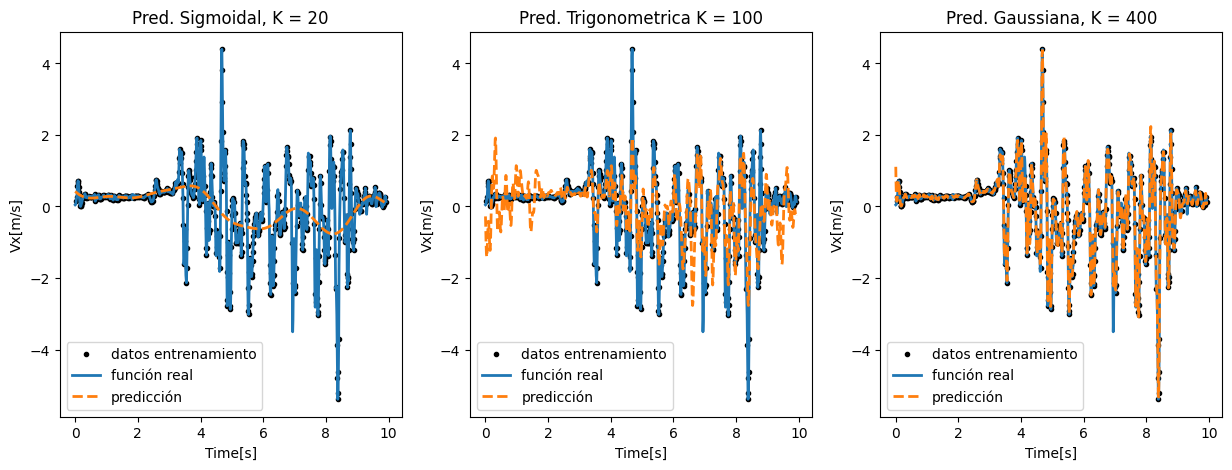

In [ ]:
# graficar resultados
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plot_prediccion(muestras, y_pred)
plt.title('Pred. Sigmoidal, K = 20');

plt.subplot(1,3,2)
plot_prediccion(muestras, y_pred2)
plt.title('Pred. Trigonometrica K = 100');

plt.subplot(1,3,3)
plot_prediccion(muestras, y_pred3)
plt.title('Pred. Gaussiana, K = 400');

**Se observa que:**
- La función Sigmoide no es la ideal en este caso ya que como se puede ver, a los datos que se alejan del cero se les asigna el valor de uno y se pierde la información de los valores que hay más allá de la unidad. Tal vez haya un mejor comportamiento para una base de datos diferente, que sus valores oscilen entre el cero y el uno.
- La función trigonométrica (es una combinación entre funciones seno y coseno) tiene un mejor comportamiento que la función anterior pero igualmente continúa presentando un error considerable.
- y por último la función gaussiana si logra tener una predicción bastante buena de los datos, la clave estuvo en dar una varianza bastante pequeña a la Gaussiana, lo cual hace que esta se parezca a la función impulso que solo existe en un único valor del dominio y por esto es que la aproximación es tan buena.

**Predicción con partición secuencial**

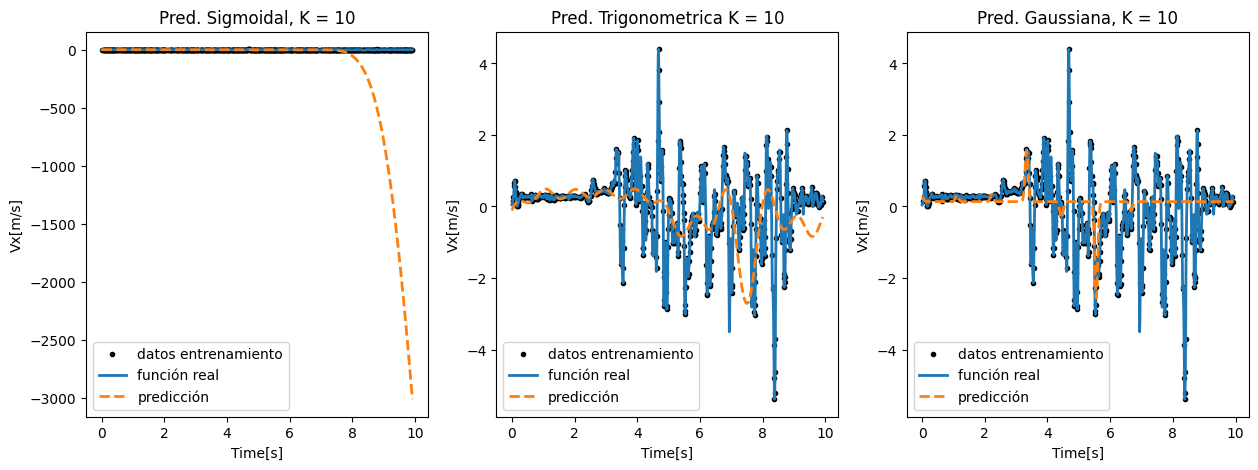

In [ ]:
# graficar resultados
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plot_prediccion(muestras, y_pred_sec)
plt.title('Pred. Sigmoidal, K = ' + str(K));

plt.subplot(1,3,2)
plot_prediccion(muestras, y_pred2_sec)
plt.title('Pred. Trigonometrica K = ' + str(K));

plt.subplot(1,3,3)
plot_prediccion(muestras, y_pred3_sec)
plt.title('Pred. Gaussiana, K = ' + str(K));

En este caso todas las predicciones son bastante erroneas, y es logico ya que el entrenamiento fue unicamente con la parte inicial de la señal, por lo que al agregar valores de los cuales no se tiene información "cercana" el modelo va a entregar valores erroneos. 
En conclusion es mas dificil generar un modelo de predicción en una partición secuencial que en una aleatoria, ya que con la secuencial se tendria que "predecir el futuro" lo cual es mas dificil de lograr.

##**6. RMSE**

In [ ]:
def rmse(y, y_pred):
  # Calculo función de error
  y = y.flatten()
  y_pred = y_pred.flatten()
  N = y.shape[0]
  difer = (y - y_pred)**2
  return np.sqrt((1.0/N) * np.sum(difer))

In [ ]:
def rmse_k(carac,K_max,titulo,Xtrain,ytrain,Xtest,ytest):

  rmse_train = []
  rmse_test = []
  K_vector = []
  #carac = expo_carac # seleccionar tipo de caracteristicas (trigo, expo, sigmo)

  for i in range(1, K_max,10):
    K = i 

    Phi_train = carac(Xtrain, K) 
    theta_ml = inferencia_max_vero_carac(Phi_train, ytrain)

    y_pred = Phi_train @ theta_ml # predicción
    rmse_train.append(rmse(ytrain, y_pred)) # medir error

    # predicción sobre datos de test 
    Phi_test = carac(Xtest, K)
    y_pred = Phi_test @ theta_ml # predicción
    rmse_test.append(rmse(ytest, y_pred)) # medir error

    K_vector.append(i)

  plt.figure(figsize=(15,4))
  plt.plot(K_vector, rmse_train, '-', label='Error train')
  plt.plot(K_vector, rmse_test, '-', label='Error test')
  plt.xticks(K_vector);
  plt.ylabel('RMSE')
  plt.xlabel('K')
  plt.title(titulo)
  plt.legend()

##**RMSE para la predicción con partición aleatoria**

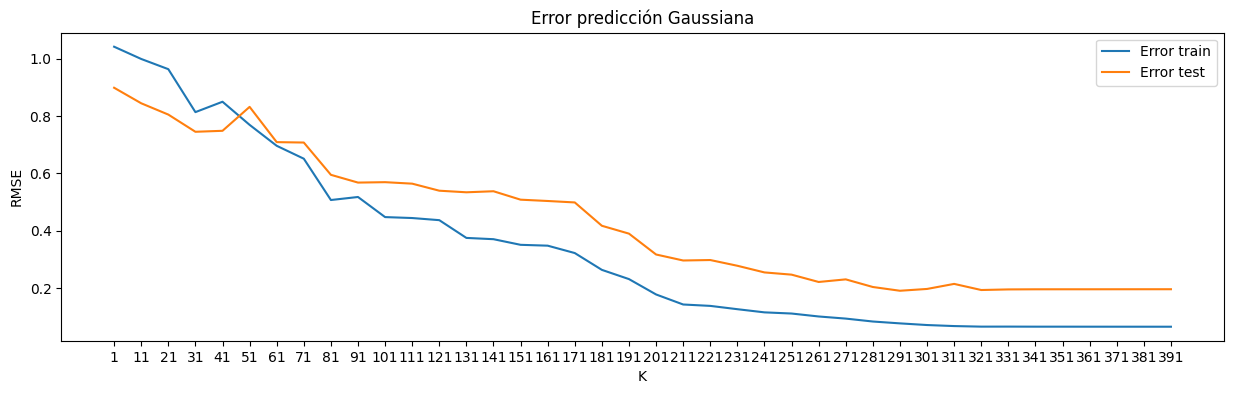

In [ ]:
rmse_k(expo_carac,400,'Error predicción Gaussiana',Xtrain,ytrain,Xtest,ytest)

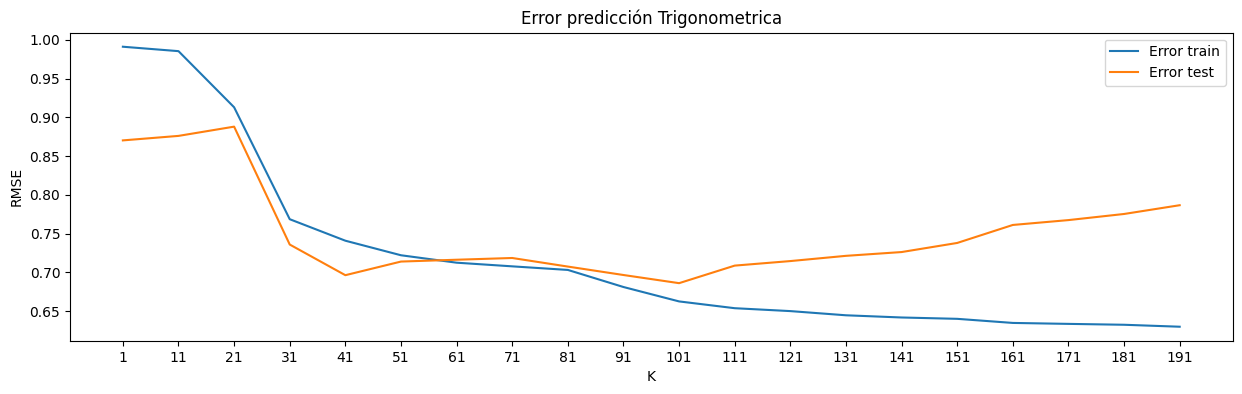

In [ ]:
rmse_k(trigo_carac,200,'Error predicción Trigonometrica',Xtrain,ytrain,Xtest,ytest)

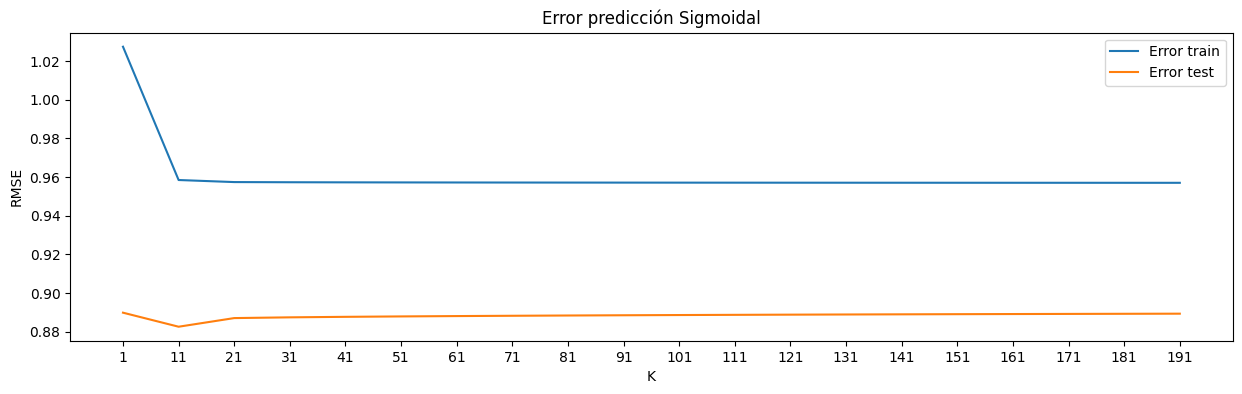

In [ ]:
rmse_k(sigmo_carac,200,'Error predicción Sigmoidal',Xtrain,ytrain,Xtest,ytest)

##**RMSE para la predicción con partición aleatoria**

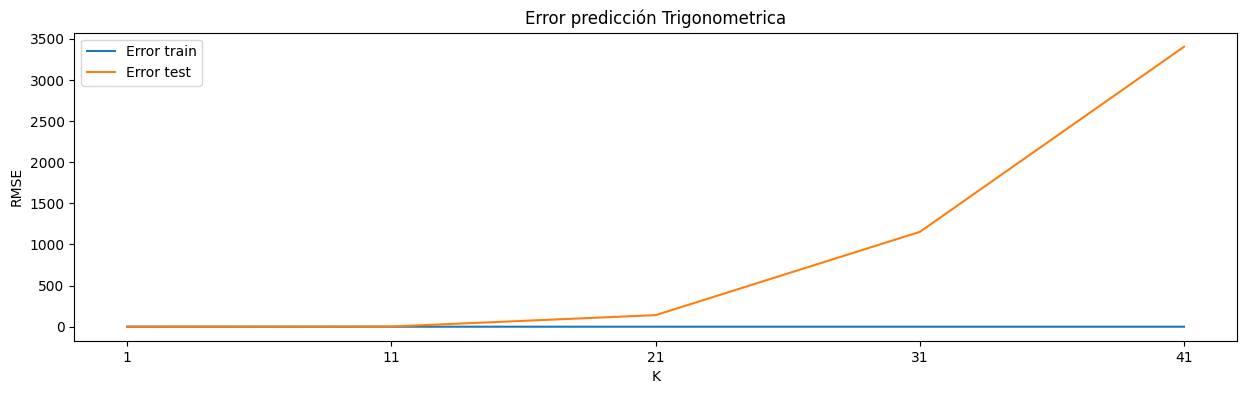

In [ ]:
rmse_k(trigo_carac,50,'Error predicción Trigonometrica',Xtrain_sec,ytrain_sec,Xtest_sec,ytest_sec)

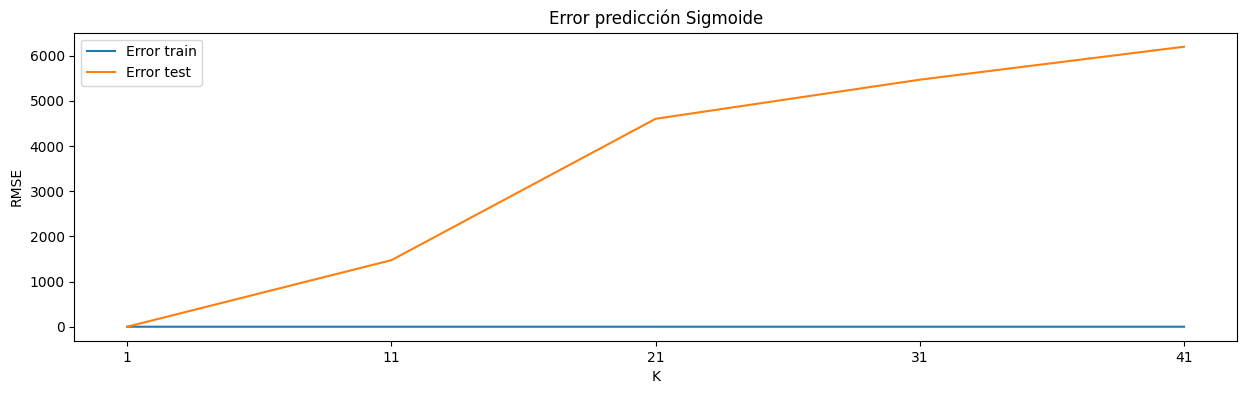

In [ ]:
rmse_k(sigmo_carac,50,'Error predicción Sigmoide',Xtrain_sec,ytrain_sec,Xtest_sec,ytest_sec)

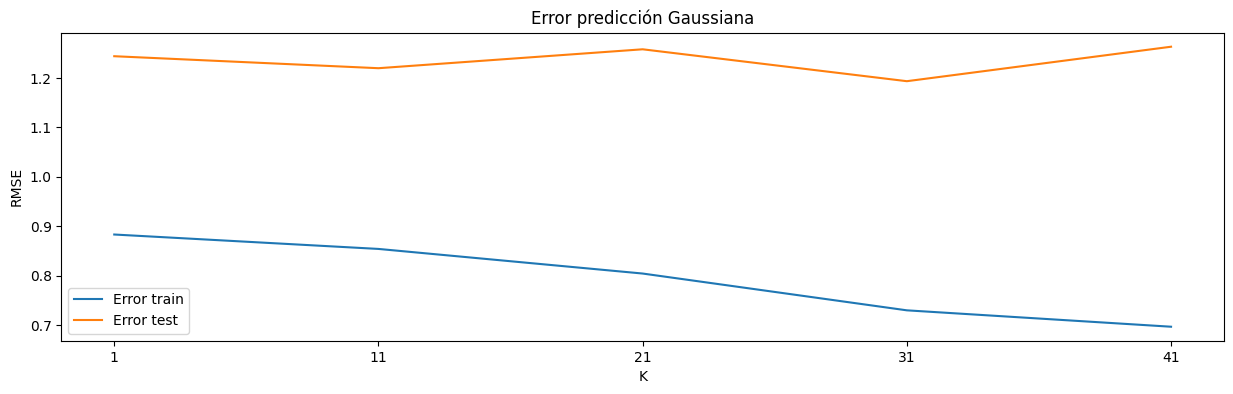

In [ ]:
rmse_k(expo_carac,50,'Error predicción Gaussiana',Xtrain_sec,ytrain_sec,Xtest_sec,ytest_sec)

##**Conclusiones:**

Como ya se había dicho anteriormente, el modelo con mayor capacidad de generalización es el Gaussiano ya que por su comportamiento de solo dar existencia a los valores cercanos a la media se logra una buena predicción en cada punto o región de la señal.


La función trigonométrica también puede tener un buen comportamiento si se le agrega regularización y así evitar que al aumentar el número de funciones base los valores de los pesos sean demasiado grandes.


Los mejores valores de M para cada modelo son los siguientes:


- M=20 para la función Sigmoide
- M=100 para la función trigonométrica
- M=400 para la función Gaussiana